In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cwd = "/content/drive/MyDrive/6.7900 Final Project"
os.chdir(cwd)
# !pwd
# os.chdir("/content")
# !pwd

In [ ]:
!ls

'6.7900 Final Paper.gdoc'		 artbench_32_2class_T4.gif
'6.7900 Final Project.ipynb'		 artbench_32_2class_test2.gif
'6.7900 Mid-term Report.gdoc'		 artbench_32_cosine_2class_T4.gif
'6.7900 Project Abstract.gdoc'		 artbench_32.gif
 artbench-10-binary.tar.gz		 artbench.gif
 ArtBench-10.csv			 data
 artbench-10-imagefolder-split		'Diffusion Models'
 artbench-10-imagefolder-split-32	'Katie - 6.7900 Final Project.ipynb'
 artbench-10-imagefolder-split-32-test	 miniroot
 artbench-10-imagefolder-split.tar	'MNIST Diffusion Models'
 artbench-10-python.tar.gz		 mnist.gif
 artbench_32_2class_4000.gif		 single_artbench_32.gif


In [ ]:
# !tar -xvf '/content/drive/MyDrive/6.7900 Final Project/artbench-10-python.tar.gz'

In [ ]:
# load in metadata
metadata_path = f'{cwd}/ArtBench-10.csv'

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

In [ ]:
metadata = pd.read_csv(metadata_path)
metadata.columns


Index(['name', 'artist', 'url', 'is_public_domain', 'length', 'width', 'label',
       'split', 'cifar_index'],
      dtype='object')

In [ ]:
metadata["label"].unique()

array(['impressionism', 'romanticism', 'expressionism', 'surrealism',
       'art_nouveau', 'renaissance', 'realism', 'post_impressionism',
       'baroque', 'ukiyo_e'], dtype=object)

In [ ]:
pd.DataFrame(metadata["artist"].value_counts())

# artists is not balanced

,artist
albrecht-durer,443
nicholas-roerich,396
raphael-kirchner,368
theophile-steinlen,358
henri-de-toulouse-lautrec,292
...,...
willem-de-kooning,1
josef-albers,1
oleh-sokolov,1
vahram-gaifedjyan,1


In [ ]:
pd.DataFrame(metadata["label"].value_counts())

# labels are balanced

,label
impressionism,6000
romanticism,6000
expressionism,6000
surrealism,6000
art_nouveau,6000
renaissance,6000
realism,6000
post_impressionism,6000
baroque,6000
ukiyo_e,6000


# Imports

In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.4 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torch.optim import Adam

import torchvision
from torchvision import datasets, transforms
from diffusers import DDPMScheduler, UNet2DModel

from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import numpy as np
import math

from IPython.display import Image, display

In [ ]:
from torchvision.datasets import CIFAR10

class ArtBench10(CIFAR10):

    base_folder = "artbench-10-batches-py"
    url = "https://artbench.eecs.berkeley.edu/files/artbench-10-python.tar.gz"
    filename = "artbench-10-python.tar.gz"
    tgz_md5 = "9df1e998ee026aae36ec60ca7b44960e"
    train_list = [
        ["data_batch_1", "c2e02a78dcea81fe6fead5f1540e542f"],
        ["data_batch_2", "1102a4dcf41d4dd63e20c10691193448"],
        ["data_batch_3", "177fc43579af15ecc80eb506953ec26f"],
        ["data_batch_4", "566b2a02ccfbafa026fbb2bcec856ff6"],
        ["data_batch_5", "faa6a572469542010a1c8a2a9a7bf436"],
    ]

    test_list = [
        ["test_batch", "fa44530c8b8158467e00899609c19e52"],
    ]
    meta = {
        "filename": "meta",
        "key": "styles",
        "md5": "5bdcafa7398aa6b75d569baaec5cd4aa",
    }

# Load ArtBench Dataset

In [ ]:
!ls

'6.7900 Final Paper.gdoc'		 artbench_32_2class_T4.gif
'6.7900 Final Project.ipynb'		 artbench_32_2class_test2.gif
'6.7900 Mid-term Report.gdoc'		 artbench_32_cosine_2class_T4.gif
'6.7900 Project Abstract.gdoc'		 artbench_32.gif
 artbench-10-binary.tar.gz		 artbench.gif
 ArtBench-10.csv			 data
 artbench-10-imagefolder-split		'Diffusion Models'
 artbench-10-imagefolder-split-32	'Katie - 6.7900 Final Project.ipynb'
 artbench-10-imagefolder-split-32-test	 miniroot
 artbench-10-imagefolder-split.tar	'MNIST Diffusion Models'
 artbench-10-python.tar.gz		 mnist.gif
 artbench_32_2class_4000.gif		 single_artbench_32.gif


In [ ]:
mini_dataset_path = f'{cwd}/miniroot'
dataset_path = 'artbench-10-imagefolder-split'
dataset_32_path = 'artbench-10-imagefolder-split-32'
dataset_32_path_test = 'artbench-10-imagefolder-split-32-test'

In [ ]:
BATCH_SIZE = 16
NUM_WORKERS = 2

In [ ]:
!ls

'6.7900 Final Paper.gdoc'		 artbench_32_2class_T4.gif
'6.7900 Final Project.ipynb'		 artbench_32_2class_test2.gif
'6.7900 Mid-term Report.gdoc'		 artbench_32_cosine_2class_T4.gif
'6.7900 Project Abstract.gdoc'		 artbench_32.gif
 artbench-10-binary.tar.gz		 artbench.gif
 ArtBench-10.csv			 data
 artbench-10-imagefolder-split		'Diffusion Models'
 artbench-10-imagefolder-split-32	'Katie - 6.7900 Final Project.ipynb'
 artbench-10-imagefolder-split-32-test	 miniroot
 artbench-10-imagefolder-split.tar	'MNIST Diffusion Models'
 artbench-10-python.tar.gz		 mnist.gif
 artbench_32_2class_4000.gif		 single_artbench_32.gif


In [ ]:
# play around with other transformations later
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    # transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

train_transform_32 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    # transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

test_transform_32 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

In [ ]:
train_dataset = ArtBench10(root=dataset_32_path, download=True, train=True, transform=train_transform_32)
test_dataset = ArtBench10(root=dataset_32_path_test, download=True, train=False, transform=train_transform_32)

# classes
classes = np.array(train_dataset.classes)
class_idxs = np.array(list(train_dataset.class_to_idx.values()))

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(classes)
print(class_idxs)

['impressionism' 'realism' 'romanticism' 'expressionism' 'baroque'
 'post_impressionism' 'art_nouveau' 'surrealism' 'ukiyo_e' 'renaissance']
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# # load 256x256 datasets
# DATASET = mini_dataset_path

# # training dataset
# train_dataset = datasets.ImageFolder(
#     root=f'{DATASET}/train',
#     transform=train_transform
# )
# # test dataset
# test_dataset = datasets.ImageFolder(
#     root=f'{DATASET}/test',
#     transform=test_transform
# )

# # classes
# classes = np.array(train_dataset.classes)
# class_idxs = np.array(list(train_dataset.class_to_idx.values()))

In [ ]:
# separate training and validation
# len(train_dataset)
# classes
# class_idxs
# n_validation = int(n * 0.1)

# validation_dataset = torch.utils.data.Subset(train_dataset, range(n_validation))
# train_dataset = torch.utils.data.Subset(train_dataset, range(n_validation, n))

In [ ]:
# only select surrealism (7) and impressionism (0)
labels = [0, 7]
train_indices = [idx for idx, target in enumerate(train_dataset.targets) if target in labels]
test_indices = [idx for idx, target in enumerate(test_dataset.targets) if target in labels]

# training data loader
class2_train_loader = DataLoader(
    Subset(train_dataset, train_indices), batch_size=BATCH_SIZE, shuffle=True, num_workers = NUM_WORKERS
)
train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers = NUM_WORKERS
)
# # # validation data loader
# # validation_loader = DataLoader(
# #     validation_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers = NUM_WORKERS
# # )
# # test data loader
class2_test_loader = DataLoader(
    Subset(test_dataset, test_indices), batch_size=BATCH_SIZE, shuffle=False, num_workers = NUM_WORKERS
)
test_loader = DataLoader(
    test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers = NUM_WORKERS
)

In [ ]:
# print(f"Training Dataset Length: {len(Subset(train_dataset, train_indices))}")
print(f"Training Dataset Length: {len(train_dataset)}")
print(f"Training Dataset Length: {len(Subset(train_dataset, train_indices))}")
# print(f"Validation Dataset Length: {len(validation_dataset)}")
# print(f"Testing Dataset Length: {len(Subset(test_dataset, test_indices))}")
print(f"Testing Dataset Length: {len(test_dataset)}")
print(f"Testing Dataset Length: {len(Subset(test_dataset, test_indices))}")
print(f"Classes:", classes)
print(train_dataset[0][0].shape, classes[train_dataset[0][1]])

Training Dataset Length: 50000
Training Dataset Length: 10000
Testing Dataset Length: 10000
Testing Dataset Length: 2000
Classes: ['impressionism' 'realism' 'romanticism' 'expressionism' 'baroque'
 'post_impressionism' 'art_nouveau' 'surrealism' 'ukiyo_e' 'renaissance']
torch.Size([3, 32, 32]) expressionism


In [ ]:
reverse_transformations = transforms.Compose([
      transforms.Lambda(lambda t: (t + 1) / 2),
      transforms.Lambda(lambda t: t.permute(1, 2, 0)), # c,h,w to h,w,c
])

def show_tensor_image_batch(images, single_row = False):
  images = images.detach().cpu()
  if (single_row):
    plt.imshow(reverse_transformations(torchvision.utils.make_grid(images, nrow=images.shape[0])))
  else:
    plt.imshow(reverse_transformations(torchvision.utils.make_grid(images)))

def show_tensor_image(images):
  if (len(images.shape) == 4):
    images = images[0, :, :, :] # show the first image in the batch
  plt.imshow(reverse_transformations(images), cmap='gray')

In [ ]:
dataiter = iter(class2_train_loader)
images, labels = next(dataiter)

impressionism


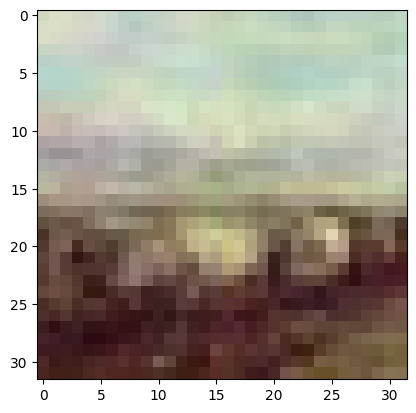

In [ ]:
print(classes[labels[0]])
show_tensor_image(images)

['impressionism' 'surrealism' 'surrealism' 'surrealism' 'impressionism'
 'surrealism' 'impressionism' 'impressionism' 'surrealism' 'impressionism'
 'surrealism' 'surrealism' 'surrealism' 'surrealism' 'impressionism'
 'surrealism']
torch.Size([16, 3, 32, 32])


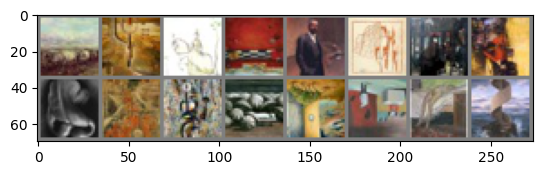

In [ ]:
print(classes[labels])
show_tensor_image_batch(images)
print(images.shape)

# set device

In [ ]:
# Getting device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}\t" + (f"{torch.cuda.get_device_name(0)}" if torch.cuda.is_available() else "CPU"))

Using device: cuda	Tesla T4


# Diffusion classifier code

## forward process

In [ ]:
class DDPM(nn.Module):
  def __init__(self, unet, n_steps, min_beta, max_beta, beta_scheduler, device):
    """
    unet: unet used for backwards process
    n_steps: number of time steps to run forward/backwards process
    min_beta: min noise
    max_beta: max noise
    beta_scheduler: noise scheduler, "linear" or "cosine"
    """
    super(DDPM, self).__init__()
    self.device = device
    self.unet = unet
    self.n_steps = n_steps
    self.min_beta = min_beta
    self.max_beta = max_beta
    self.betas = self.beta_schedule(n_steps, min_beta, max_beta, beta_scheduler).to(device)

    # precompute everything
    self.alphas = 1-self.betas
    self.alpha_bars = torch.cumprod(self.alphas, axis=0).to(device)
    self.alpha_bars_prev = F.pad(self.alpha_bars[:-1], (1, 0), value=1.0).to(device) # pad the first element with 1.0
    self.sqrt_alpha_bars = torch.sqrt(self.alpha_bars).to(device)
    self.sqrt_one_minus_alpha_bars = torch.sqrt(1.0 - self.alpha_bars).to(device)
    # https://lilianweng.github.io/posts/2021-07-11-diffusion-models/
    # posterior variance = \tilde{\beta}
    self.posterior_variance = self.betas * (1.0 - self.alpha_bars_prev) / (1.0 - self.alpha_bars)

    self.float()

  def beta_schedule(self, n_steps, start, end, beta_scheduler):
    match beta_scheduler:
      case "linear":
        # 1d tensor of size n_steps
        return torch.linspace(start, end, n_steps)
      case "cosine":
        # scheduler from: https://arxiv.org/pdf/2102.09672.pdf
        cosine_offset = 8e-3
        timesteps = torch.arange(n_steps, dtype = torch.float64)
        f = torch.cos((timesteps / n_steps + cosine_offset) / (1 + cosine_offset) * math.pi / 2)
        # TODO(azliu): pow(3) "looks" better than pow(2), for dimension = 256. might need to change this depending on the size of the images
        f = f.pow(1.5)
        alpha_bars = F.pad(f / f[0], (1, 0), value=1.0)
        betas = 1 - (alpha_bars[1:] / alpha_bars[:-1])
        return betas.clamp(max=0.999)
      case _:
        raise ValueError(f"Invalid beta scheduler: {beta_scheduler}")

  # def forward(self, x0, t, noise = None):
  #   """
  #   x0: input image (b, c, h, w)
  #   t: time step (b)
  #   """
  #   sqrt_alpha_bar = self.sqrt_alpha_bars[t]
  #   sqrt_one_minus_alpha_bar = self.sqrt_one_minus_alpha_bars[t]

  #   if noise is None:
  #       noise = torch.randn_like(x0)

  #   # x0: (b, c, h, w)
  #   # all alpha_bars: (b) => add three dims to accommodate pixels in every channel
  #   sqrt_alpha_bar = sqrt_alpha_bar[:, None, None, None]
  #   sqrt_one_minus_alpha_bar = sqrt_one_minus_alpha_bar[:, None, None, None]
  #   noisy = sqrt_alpha_bar.to(device) * x0.to(device) + sqrt_one_minus_alpha_bar.to(device) * noise.to(device)
  #   return noisy
  def forward(self, x0, t, eta=None):
    # Make input image more noisy (we can directly skip to the desired step)
    # n, c, h, w = x0.shape
    a_bar = self.alpha_bars[t]

    if eta is None:
        # TODO (fill in): define the eta noise sampled as a random gaussian
        # batch of n samples corresponding to n images.
        eta = torch.randn(x0.shape).to(device)

    # TODO: define the noisy image xt using x0, a_bar, eta
    # (hint: use the xt formula for calculating xt directly from x0)
    a_bar = a_bar[:, None, None, None]
    noisy = x0.to(device) * torch.sqrt(a_bar) + eta * torch.sqrt(1-a_bar)
    # noisy = torch.mul(x0, torch.sqrt(a_bar).view(n,c,h,w)) + torch.mul(eta, torch.sqrt(1-a_bar))
    return noisy

  def backward(self, x, t, label = None):
    """
    x0: input image
    t: time step
    """
    if (label is not None):
      label = label.to(device)
    return self.unet(x.to(device), t.to(device), label)
    # return self.unet(x.to(device), t.to(device))

In [ ]:
T = 1000

ddpm_test_linear = DDPM(None, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="linear", device=device)
ddpm_test_cosine = DDPM(None, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="cosine", device=device)

In [ ]:
# plt.plot(np.arange(T), ddpm_test_linear.alpha_bars.detach().cpu().numpy(), color='orange', label='linear')
# plt.plot(np.arange(T), ddpm_test_cosine.alpha_bars.detach().cpu().numpy(), color='blue', label='cosine')
# plt.xlabel('time step')
# plt.ylabel(r'$\overline{\alpha}_t$')
# plt.legend()
def reduce(llls):
  return [x for x in llls[::10]]
# print(reduce(list(np.arange(T))))
# print(reduce(list(ddpm_test_linear.alpha_bars.detach().cpu().numpy())))
# print(reduce(list(ddpm_test_cosine.alpha_bars.detach().cpu().numpy())))

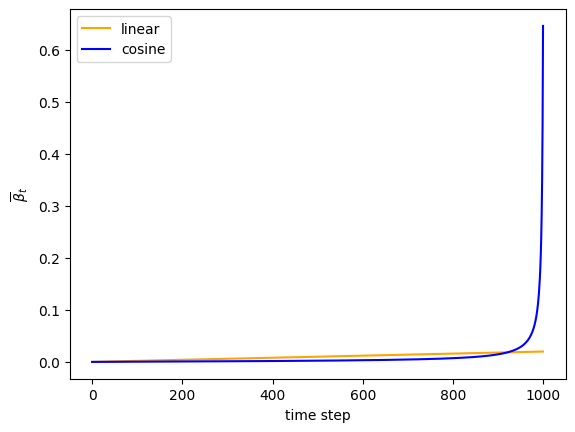

In [ ]:
plt.plot(np.arange(T), ddpm_test_linear.betas.detach().cpu().numpy(), color='orange', label='linear')
plt.plot(np.arange(T), ddpm_test_cosine.betas.detach().cpu().numpy(), color='blue', label='cosine')
plt.xlabel('time step')
plt.ylabel(r'$\overline{\beta}_t$')
plt.legend()

In [ ]:
def show_forward_diffusion(ddpm, img, num_images, mnist=False, mini=False):
  """
  show example forward diffusion given ddpm model and test image
  """
  stepsize = int(ddpm.n_steps/(num_images - 1))
  shape = (1, 28, 28) if mnist else (3, 32, 32) if mini else (3, 256, 256)
  images = torch.zeros(num_images, *shape)
  for idx in range(num_images - 1):
    noised_image = ddpm.forward(img, torch.tensor([idx * stepsize]))
    images[idx] = noised_image[0]
  # show the final timestep as the last image
  noised_image = ddpm.forward(img, torch.tensor([ddpm.n_steps - 1]))
  images[num_images - 1] = noised_image[0]

  show_tensor_image_batch(images, single_row = True)

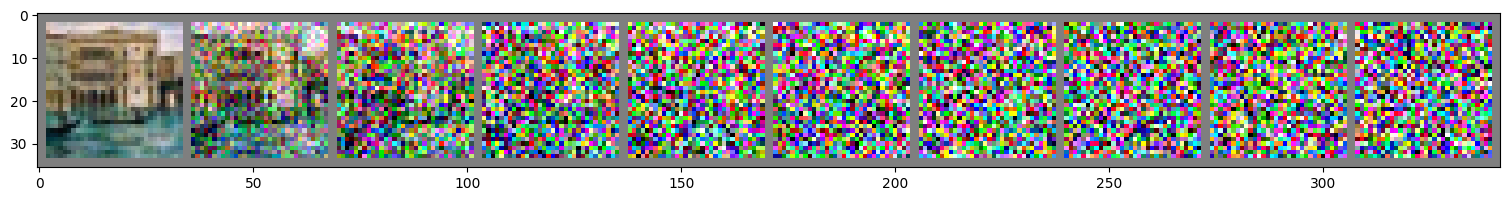

In [ ]:
# Simulate forward diffusion with linear scheduling
plt.figure(figsize = (20,2))
image = next(iter(train_loader))[0][0]
show_forward_diffusion(ddpm_test_linear, image, num_images = 10, mini=True)

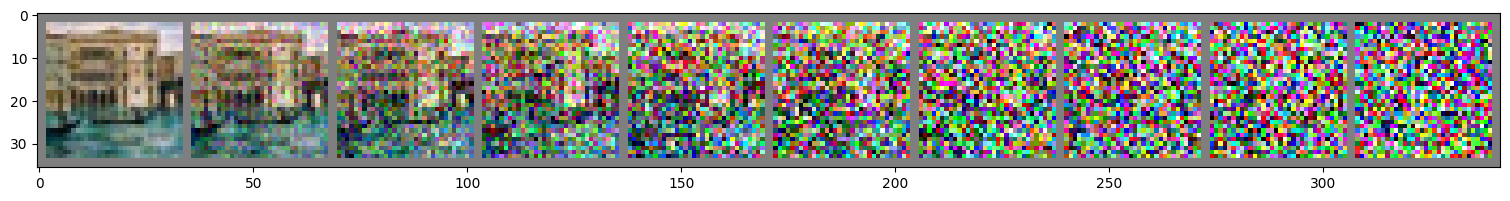

In [ ]:
# forward diffusion with cosine scheduling
plt.figure(figsize = (20,2))
show_forward_diffusion(ddpm_test_cosine, image, num_images = 10, mini=True)

# UNet for backwards diffusion process

## helper modules
code structure modelled very loosely after https://arxiv.org/pdf/2105.05233.pdf

In [ ]:
# taken from homework assignment
def sinusoidal_embedding(n, d):
    # Returns the standard positional embedding
    embedding = torch.zeros(n, d)
    wk = torch.tensor([1 / 10_000 ** (2 * j / d) for j in range(d)])
    wk = wk.reshape((1, d))
    t = torch.arange(n).reshape((n, 1))
    embedding[:,::2] = torch.sin(t * wk[:,::2])
    embedding[:,1::2] = torch.cos(t * wk[:,::2])

    return embedding

In [ ]:
root = 10
# root = 32
class ConvBlock(nn.Module):
  def __init__(self, in_ch, out_ch):
    super().__init__()
    self.conv1 = nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=1, padding=1)
    self.activation1 = nn.SiLU()
    self.groupnorm1 = nn.GroupNorm(num_groups=1, num_channels=out_ch)
    self.conv2 = nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1)
    self.activation2 = nn.SiLU()
    self.groupnorm2 = nn.GroupNorm(num_groups=1, num_channels=out_ch)

  def forward(self, x):
    # convolve, activate, normalize
    out = self.conv1(x)
    out = self.activation1(out)
    out = self.groupnorm1(out)
    out = self.conv2(out)
    out = self.activation2(out)
    out = self.groupnorm2(out)
    return out

class DownBlock(nn.Module):
    def __init__(self, in_ch, out_ch, time_emb_dim):
      super().__init__()

      # handle convolutional layers
      self.conv1 = ConvBlock(in_ch, out_ch)
      self.conv2 = ConvBlock(out_ch, out_ch)
      self.conv3 = ConvBlock(out_ch, out_ch)
      # self.maxpool = nn.MaxPool2d(2) # c,h,w -> c,h/2,w/2
      self.down = nn.Conv2d(out_ch, out_ch, kernel_size=4, stride=2, padding=1)

      # handle time embeddings
      self.linear1 = nn.Linear(time_emb_dim, in_ch)
      self.silu = nn.SiLU()
      self.linear2 = nn.Linear(in_ch, in_ch)

    def forward(self, x, t):
      # add time embedding
      embedding = self.linear1(t)
      embedding = self.silu(embedding)
      embedding = self.linear2(embedding)
      embedding = embedding[:, :, None, None].repeat(1,1,x.shape[-2],x.shape[-1])
      x = x + embedding

      # perform convolutions
      out = self.conv1(x)
      out = self.conv2(out)
      out = self.conv3(out)

      # down sample
      out = self.down(out)

      return out

class UpBlock(nn.Module):
    def __init__(self, in_ch, out_ch, time_emb_dim, time_targ_dim):
      super().__init__()

      # handle convolutional layers
      self.conv1 = ConvBlock(in_ch, out_ch)
      self.conv2 = ConvBlock(out_ch, out_ch)
      self.conv3 = ConvBlock(out_ch, out_ch)

      kern = 4
      # scale_factor = 2
      if (in_ch == 8*root and out_ch == 4*root):
        kern = 5
        # scale_factor = 7/3
      # self.up = nn.Upsample(scale_factor=scale_factor, mode='bilinear', align_corners = True)
      self.up = nn.ConvTranspose2d(out_ch, out_ch, kernel_size=kern, stride=2, padding=1)

      # handle time embeddings
      self.linear1 = nn.Linear(time_emb_dim, time_targ_dim)
      self.silu = nn.SiLU()
      self.linear2 = nn.Linear(time_targ_dim, time_targ_dim)

    def forward(self, x, skipx, t):
      # time embedding
      embedding = self.linear1(t)
      embedding = self.silu(embedding)
      embedding = self.linear2(embedding)
      # embedding = embedding[:, :, None, None].repeat(1,1,x.shape[-2],x.shape[-1]) # add embedding to all pixels in image
      # x = x + embedding
      x = x + embedding.reshape(len(x), -1, 1, 1)

      # convolutions
      out = torch.cat([x, skipx], dim=1)
      out = self.conv1(out)
      out = self.conv2(out)
      out = self.conv3(out)

      # up sample
      out = self.up(out)

      return out

# TODO(azliu): try training the model with self attention?

In [ ]:
img_ch = 1

class UNet(nn.Module):
  def __init__(self, n_steps, n_classes, time_embed_dim=100):
    super().__init__()

    # time embeddings
    self.time_embedding = nn.Embedding(n_steps, time_embed_dim)
    self.time_embedding.weight.data = sinusoidal_embedding(n_steps, time_embed_dim)
    self.time_embedding.requires_grad_(False)

    # class embeddings
    self.class_embedding = nn.Embedding(n_classes, time_embed_dim)

    # unet
    self.input_conv = ConvBlock(img_ch, root)
    self.down1 = DownBlock(root, 2*root, time_embed_dim)
    self.down2 = DownBlock(2*root, 4*root, time_embed_dim)
    self.down3 = DownBlock(4*root, 4*root, time_embed_dim)

    self.bridge1 = ConvBlock(4*root, 8*root)
    self.bridge2 = ConvBlock(8*root, 8*root)
    self.bridge3 = ConvBlock(8*root, 4*root)

    self.up1 = UpBlock(8*root, 4*root, time_embed_dim, 4*root)
    self.up2 = UpBlock(8*root, 2*root, time_embed_dim, 4*root)
    self.up3 = UpBlock(4*root, root, time_embed_dim, 2*root)

    self.output_conv = nn.Conv2d(root, img_ch, kernel_size=1)

  def forward(self, x, t, label=None):
    t = self.time_embedding(t).to(device)
    if (label is not None):
      t += self.class_embedding(label).to(device)

    skip_connections = []
    out = self.input_conv(x)
    out = self.down1(out, t)
    skip_connections.append(out)
    out = self.down2(out, t)
    skip_connections.append(out)
    out = self.down3(out, t)
    skip_connections.append(out)
    # skip_connections.append(out)
    # out = self.down4(out, t)

    out = self.bridge1(out)
    out = self.bridge2(out)
    out = self.bridge3(out)

    out = self.up1(out, skip_connections.pop(), t)
    out = self.up2(out, skip_connections.pop(), t)
    out = self.up3(out, skip_connections.pop(), t)
    # out = self.up4(out, skip_connections.pop(), t)

    out = self.output_conv(out)
    return out

In [ ]:
class MyBlock(nn.Module):
    def __init__(self, shape, in_c, out_c, kernel_size=3, stride=1, padding=1, activation=None, normalize=True):
        super(MyBlock, self).__init__()
        self.ln = nn.LayerNorm(shape)
        self.conv1 = nn.Conv2d(in_c, out_c, kernel_size, stride, padding)
        self.conv2 = nn.Conv2d(out_c, out_c, kernel_size, stride, padding)
        self.activation = nn.SiLU() if activation is None else activation
        self.normalize = normalize
        self.double()

    def forward(self, x):
        out = self.ln(x) if self.normalize else x
        out = self.conv1(out)
        out = self.activation(out)
        out = self.conv2(out)
        out = self.activation(out)
        return out

class MyUNet(nn.Module):
    def __init__(self, n_steps=1000, time_emb_dim=100, n_classes=10):
        super(MyUNet, self).__init__()

        # Sinusoidal embedding
        self.time_embed = nn.Embedding(n_steps, time_emb_dim)
        self.time_embed.weight.data = sinusoidal_embedding(n_steps, time_emb_dim)
        self.time_embed.requires_grad_(False)

        self.class_embedding = nn.Embedding(n_classes, time_emb_dim)

        # First half
        self.te1 = self._make_te(time_emb_dim, 1)
        self.b1 = nn.Sequential(
            MyBlock((img_ch, 32, 32), 1, 10),
            MyBlock((10, 32, 32), 10, 10),
            MyBlock((10, 32, 32), 10, 10)
        )
        self.down1 = nn.Conv2d(10, 10, 4, 2, 1)

        self.te2 = self._make_te(time_emb_dim, 10)
        self.b2 = nn.Sequential(
            MyBlock((10, 16, 16), 10, 20),
            MyBlock((20, 16, 16), 20, 20),
            MyBlock((20, 16, 16), 20, 20)
        )
        self.down2 = nn.Conv2d(20, 20, 4, 2, 1)

        self.te3 = self._make_te(time_emb_dim, 20)
        self.b3 = nn.Sequential(
            MyBlock((20, 8, 8), 20, 40),
            MyBlock((40, 8, 8), 40, 40),
            MyBlock((40, 8, 8), 40, 40)
        )
        self.down3 = nn.Sequential(
            nn.Conv2d(40, 40, 2, 1),
            nn.SiLU(),
            nn.Conv2d(40, 40, 4, 2, 1)
        )

        # Bottleneck
        self.te_mid = self._make_te(time_emb_dim, 40)
        self.b_mid = nn.Sequential(
            MyBlock((40, 4, 4), 40, 20),
            MyBlock((20, 4, 4), 20, 20),
            MyBlock((20, 4, 4), 20, 40)
        )

        # Second half
        self.up1 = nn.Sequential(
            nn.ConvTranspose2d(40, 40, 4, 2, 1),
            nn.SiLU(),
            nn.ConvTranspose2d(40, 40, 2, 1)
        )

        self.te4 = self._make_te(time_emb_dim, 80)
        self.b4 = nn.Sequential(
            MyBlock((80, 8, 8), 80, 40),
            MyBlock((40, 8, 8), 40, 20),
            MyBlock((20, 8, 8), 20, 20)
        )

        self.up2 = nn.ConvTranspose2d(20, 20, 4, 2, 1)
        self.te5 = self._make_te(time_emb_dim, 40)
        self.b5 = nn.Sequential(
            MyBlock((40, 16, 16), 40, 20),
            MyBlock((20, 16, 16), 20, 10),
            MyBlock((10, 16, 16), 10, 10)
        )

        self.up3 = nn.ConvTranspose2d(10, 10, 4, 2, 1)
        self.te_out = self._make_te(time_emb_dim, 20)
        self.b_out = nn.Sequential(
            MyBlock((20, 32, 32), 20, 10),
            MyBlock((10, 32, 32), 10, 10),
            MyBlock((10, 32, 32), 10, 10, normalize=False)
        )

        self.conv_out = nn.Conv2d(10, img_ch, 3, 1, 1)

    def forward(self, x, t, label = None):
        # x is (N, 2, 28, 28) (image with positional embedding stacked on channel dimension)
        t = self.time_embed(t)
        if (label is not None):
          t += self.class_embedding(label).to(device)

        n = len(x)
        out1 = self.b1(x + self.te1(t).reshape(n, -1, 1, 1))  # (N, 10, 28, 28)
        out2 = self.b2(self.down1(out1) + self.te2(t).reshape(n, -1, 1, 1))  # (N, 20, 14, 14)
        out3 = self.b3(self.down2(out2) + self.te3(t).reshape(n, -1, 1, 1))  # (N, 40, 7, 7)

        out_mid = self.b_mid(self.down3(out3) + self.te_mid(t).reshape(n, -1, 1, 1))  # (N, 40, 3, 3)

        out4 = torch.cat((out3, self.up1(out_mid)), dim=1)  # (N, 80, 7, 7)
        out4 = self.b4(out4 + self.te4(t).reshape(n, -1, 1, 1))  # (N, 20, 7, 7)

        out5 = torch.cat((out2, self.up2(out4)), dim=1)  # (N, 40, 14, 14)
        out5 = self.b5(out5 + self.te5(t).reshape(n, -1, 1, 1))  # (N, 10, 14, 14)

        out = torch.cat((out1, self.up3(out5)), dim=1)  # (N, 20, 28, 28)
        out = self.b_out(out + self.te_out(t).reshape(n, -1, 1, 1))  # (N, 1, 28, 28)

        out = self.conv_out(out)

        return out

    def _make_te(self, dim_in, dim_out):
        return nn.Sequential(
            nn.Linear(dim_in, dim_out),
            nn.SiLU(),
            nn.Linear(dim_out, dim_out)
        )

class MyUNetMNIST(nn.Module):
    def __init__(self, n_steps=1000, time_emb_dim=100, n_classes=10):
        super(MyUNetMNIST, self).__init__()

        # Sinusoidal embedding
        self.time_embed = nn.Embedding(n_steps, time_emb_dim)
        self.time_embed.weight.data = sinusoidal_embedding(n_steps, time_emb_dim)
        self.time_embed.requires_grad_(False)

        self.class_embedding = nn.Embedding(n_classes, time_emb_dim)

        # First half
        self.te1 = self._make_te(time_emb_dim, 1)
        self.b1 = nn.Sequential(
            MyBlock((img_ch, 28, 28), 1, 10),
            MyBlock((10, 28, 28), 10, 10),
            MyBlock((10, 28, 28), 10, 10)
        )
        self.down1 = nn.Conv2d(10, 10, 4, 2, 1)

        self.te2 = self._make_te(time_emb_dim, 10)
        self.b2 = nn.Sequential(
            MyBlock((10, 14, 14), 10, 20),
            MyBlock((20, 14, 14), 20, 20),
            MyBlock((20, 14, 14), 20, 20)
        )
        self.down2 = nn.Conv2d(20, 20, 4, 2, 1)

        self.te3 = self._make_te(time_emb_dim, 20)
        self.b3 = nn.Sequential(
            MyBlock((20, 7, 7), 20, 40),
            MyBlock((40, 7, 7), 40, 40),
            MyBlock((40, 7, 7), 40, 40)
        )
        self.down3 = nn.Sequential(
            nn.Conv2d(40, 40, 2, 1),
            nn.SiLU(),
            nn.Conv2d(40, 40, 4, 2, 1)
        )

        # Bottleneck
        self.te_mid = self._make_te(time_emb_dim, 40)
        self.b_mid = nn.Sequential(
            MyBlock((40, 3, 3), 40, 20),
            MyBlock((20, 3, 3), 20, 20),
            MyBlock((20, 3, 3), 20, 40)
        )

        # Second half
        self.up1 = nn.Sequential(
            nn.ConvTranspose2d(40, 40, 4, 2, 1),
            nn.SiLU(),
            nn.ConvTranspose2d(40, 40, 2, 1)
        )

        self.te4 = self._make_te(time_emb_dim, 80)
        self.b4 = nn.Sequential(
            MyBlock((80, 7, 7), 80, 40),
            MyBlock((40, 7, 7), 40, 20),
            MyBlock((20, 7, 7), 20, 20)
        )

        self.up2 = nn.ConvTranspose2d(20, 20, 4, 2, 1)
        self.te5 = self._make_te(time_emb_dim, 40)
        self.b5 = nn.Sequential(
            MyBlock((40, 14, 14), 40, 20),
            MyBlock((20, 14, 14), 20, 10),
            MyBlock((10, 14, 14), 10, 10)
        )

        self.up3 = nn.ConvTranspose2d(10, 10, 4, 2, 1)
        self.te_out = self._make_te(time_emb_dim, 20)
        self.b_out = nn.Sequential(
            MyBlock((20, 28, 28), 20, 10),
            MyBlock((10, 28, 28), 10, 10),
            MyBlock((10, 28, 28), 10, 10, normalize=False)
        )

        self.conv_out = nn.Conv2d(10, img_ch, 3, 1, 1)

    def forward(self, x, t, label = None):
        # x is (N, 2, 28, 28) (image with positional embedding stacked on channel dimension)
        t = self.time_embed(t)
        if (label is not None):
          t += self.class_embedding(label).to(device)

        x = x.float()

        n = len(x)
        out1 = self.b1(x + self.te1(t).reshape(n, -1, 1, 1))  # (N, 10, 28, 28)
        out2 = self.b2(self.down1(out1) + self.te2(t).reshape(n, -1, 1, 1))  # (N, 20, 14, 14)
        out3 = self.b3(self.down2(out2) + self.te3(t).reshape(n, -1, 1, 1))  # (N, 40, 7, 7)

        out_mid = self.b_mid(self.down3(out3) + self.te_mid(t).reshape(n, -1, 1, 1))  # (N, 40, 3, 3)

        out4 = torch.cat((out3, self.up1(out_mid)), dim=1)  # (N, 80, 7, 7)
        out4 = self.b4(out4 + self.te4(t).reshape(n, -1, 1, 1))  # (N, 20, 7, 7)

        out5 = torch.cat((out2, self.up2(out4)), dim=1)  # (N, 40, 14, 14)
        out5 = self.b5(out5 + self.te5(t).reshape(n, -1, 1, 1))  # (N, 10, 14, 14)

        out = torch.cat((out1, self.up3(out5)), dim=1)  # (N, 20, 28, 28)
        out = self.b_out(out + self.te_out(t).reshape(n, -1, 1, 1))  # (N, 1, 28, 28)

        out = self.conv_out(out)

        return out

    def _make_te(self, dim_in, dim_out):
        return nn.Sequential(
            nn.Linear(dim_in, dim_out),
            nn.SiLU(),
            nn.Linear(dim_out, dim_out)
        )

In [ ]:
# https://github.com/huggingface/diffusion-models-class/blob/main/unit2/02_class_conditioned_diffusion_model_example.ipynb
class ClassConditionedUnet(nn.Module):
  def __init__(self, num_classes=10, class_emb_size=4):
    super().__init__()

    # The embedding layer will map the class label to a vector of size class_emb_size
    self.class_emb = nn.Embedding(num_classes, class_emb_size)

    # Self.model is an unconditional UNet with extra input channels to accept the conditioning information (the class embedding)
    self.model = UNet2DModel(
        sample_size=32,           # the target image resolution
        in_channels=3 + class_emb_size, # Additional input channels for class cond.
        out_channels=3,           # the number of output channels
        layers_per_block=2,       # how many ResNet layers to use per UNet block
        block_out_channels=(32, 64, 64),
        down_block_types=(
            "DownBlock2D",        # a regular ResNet downsampling block
            "AttnDownBlock2D",    # a ResNet downsampling block with spatial self-attention
            "AttnDownBlock2D",
        ),
        up_block_types=(
            "AttnUpBlock2D",
            "AttnUpBlock2D",      # a ResNet upsampling block with spatial self-attention
            "UpBlock2D",          # a regular ResNet upsampling block
          ),
    )

  # Our forward method now takes the class labels as an additional argument
  def forward(self, x, t, class_labels):
    # Shape of x:
    bs, ch, w, h = x.shape

    # class conditioning in right shape to add as additional input channels
    class_cond = self.class_emb(class_labels) # Map to embedding dimension
    class_cond = class_cond.view(bs, class_cond.shape[1], 1, 1).expand(bs, class_cond.shape[1], w, h)
    # x is shape (bs, 1, 28, 28) and class_cond is now (bs, 4, 28, 28)

    # Net input is now x and class cond concatenated together along dimension 1
    net_input = torch.cat((x, class_cond), 1) # (bs, 5, 28, 28)

    # Feed this to the UNet alongside the timestep and return the prediction
    return self.model(net_input, t).sample # (bs, 1, 28, 28)

['expressionism' 'post_impressionism' 'baroque' 'expressionism'
 'renaissance']


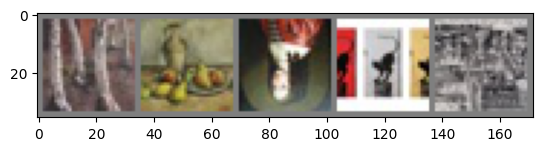

In [ ]:
TEST_BATCH_SIZE = 5
TEST_T = 100

test_unet = UNet(TEST_T, n_classes=10).to(device)
test_ddpm = DDPM(test_unet, n_steps=TEST_T, min_beta=0.0001, max_beta=0.02, beta_scheduler="linear", device=device)

test_images, test_labels = next(iter(train_loader))
test_images = test_images[:TEST_BATCH_SIZE]
test_labels = test_labels[:TEST_BATCH_SIZE]
test_time = torch.randint(0, TEST_T, (TEST_BATCH_SIZE,))

show_tensor_image_batch(test_images)
print(classes[test_labels])

# make sure that dimensions all work
@torch.no_grad()
def test(imgs, time, labels):
  imgs = imgs.to(device)
  output = test_unet(imgs, time.to(device), labels.to(device))
  show_tensor_image_batch(output)

In [ ]:
# test(test_images, test_time, test_labels) # make sure this produces an output

# sample an image

In [ ]:
@torch.no_grad()
def sample(ddpm, x, t, label):
  """
  sample noise for a specific timestep
  if not at
  the beginning, adds this noise to the image
  """
  if (t[0] == 0):
    return x.float()

  betas_t = ddpm.betas[t][:, None, None, None]
  sqrt_one_minus_alpha_bars = ddpm.sqrt_one_minus_alpha_bars[t][:, None, None, None].to(device)
  sqrt_recip_alphas = 1.0 / ddpm.alphas[t][:, None, None, None].sqrt().to(device)
  posterior_variance = ddpm.posterior_variance[t][:, None, None, None].to(device)

  eta_theta = ddpm.backward(x, t, label)
  predicted_image = sqrt_recip_alphas * (
      x - betas_t * eta_theta / sqrt_one_minus_alpha_bars
  ).to(device)

  if t[0] == 0:
      return predicted_image.float()
  else:
      noise = torch.randn_like(x)
      return (predicted_image + torch.sqrt(posterior_variance) * noise).float()

@torch.no_grad()
def show_backward_diffusion(ddpm, label=None, num_images=10, img=None, n_steps=None, mnist=False, mini=False):
  """
  generate an image from noise with a given label (None means any image)
  display the process in num_images
  """
  if (img is None):
    # start from random noise
    shape = (1,1,28,28) if mnist else (1,3,32,32) if mini else (1,3,256,256)
    x = torch.randn(shape).to(device)
    n_steps = ddpm.n_steps-1
  else:
    if (n_steps is None):
      raise ValueError("n_steps should not be none")

    x = ddpm.forward(img, torch.tensor([n_steps]), torch.randn(img.shape).to(device))
    x = torch.clamp(x, -1., 1.)

  stepsize = int(n_steps/(num_images))+1
  images = torch.zeros(num_images, *x[0].shape)

  # step through backwards diffusion process
  for t in tqdm(range(n_steps,-1,-1)):
    timesteps = torch.full((1,), t).to(device)
    x = sample(ddpm, x, timesteps, label)
    # x = torch.clamp(x, -1., 1.)
    if (t % stepsize == 0):
      images[t//stepsize] = x
  images[0] = x
  images = torch.flip(images, dims=(0,))
  show_tensor_image_batch(images, single_row = True)
  return images

In [ ]:
# plt.figure(figsize=(20,2))
# test_ddpm = test_ddpm.to(device)
# images = show_backward_diffusion(test_ddpm, None, 10)

# training loop

code copied directly from homework training loop

In [ ]:
import torchvision.datasets as datasets

In [ ]:
mnist_transform = transforms.Compose([
    # transforms.Resize((256, 256)), mnist=28x28
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5],
        std=[0.5]
    )
])
mnist_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=mnist_transform)

tensor([7, 9, 8, 5, 3, 1, 0, 4, 7, 6, 9, 1, 3, 5, 3, 4])


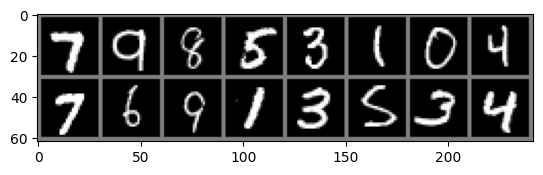

In [ ]:
mnist_train_loader = DataLoader(
    mnist_train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers = NUM_WORKERS
)
dataiter = iter(mnist_train_loader)
images, labels = next(dataiter)
show_tensor_image_batch(images)
print(labels)

In [ ]:
# save model and loss files to drive
os.chdir(cwd)
!ls

'6.7900 Final Paper.gdoc'		 artbench_32_2class_T4.gif
'6.7900 Final Project.ipynb'		 artbench_32_2class_test2.gif
'6.7900 Mid-term Report.gdoc'		 artbench_32_cosine_2class_T4.gif
'6.7900 Project Abstract.gdoc'		 artbench_32.gif
 artbench-10-binary.tar.gz		 artbench.gif
 ArtBench-10.csv			 data
 artbench-10-imagefolder-split		'Diffusion Models'
 artbench-10-imagefolder-split-32	'Katie - 6.7900 Final Project.ipynb'
 artbench-10-imagefolder-split-32-test	 miniroot
 artbench-10-imagefolder-split.tar	'MNIST Diffusion Models'
 artbench-10-python.tar.gz		 mnist.gif
 artbench_32_2class_4000.gif		 single_artbench_32.gif


In [ ]:
FOLDER = "Diffusion Models"

# set training parameters
store_path = f"{FOLDER}/ddpm_cosine_no_attention.pt"
store_loss_path = f"{FOLDER}/loss_cosine_no_attention.pt"
T = 4000
unet_cosine = UNet(n_steps=T, n_classes = 10)
ddpm_cosine = DDPM(unet_cosine, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="cosine", device=device).to(device)
n_epochs = 100
lr = 1e-3
LAST_EPOCH = -1

In [ ]:
FOLDER = "Diffusion Models"

# set training parameters
store_path = f"{FOLDER}/ddpm_linear_no_attention_embeddings_before.pt"
store_loss_path = f"{FOLDER}/loss_linear_no_attention_embeddings_before.pt"
T = 4000
unet_linear_embeddings_before = UNet(n_steps=T, n_classes = 10)
ddpm_linear_embeddings_before = DDPM(unet_linear_embeddings_before, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="linear", device=device).to(device)
n_epochs = 100
lr = 1e-3
LAST_EPOCH = -1

In [ ]:
# FOLDER = "Diffusion Models"

# # set training parameters
# store_path = f"{FOLDER}/ddpm_linear_32.pt"
# store_loss_path = f"{FOLDER}/loss_linear_32.pt"
# T = 1000
# # unet_linear_32 = UNet(n_steps=T, n_classes = 10)
# unet_linear_32 = MyUNet(n_steps=T)
# ddpm_linear_32 = DDPM(unet_linear_32, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="linear", device=device).to(device)
# n_epochs = 100
# lr = 1e-3
# LAST_EPOCH = -1

In [ ]:
FOLDER = "MNIST Diffusion Models"

# set training parameters
store_path = f"{FOLDER}/ddpm_mnist_asdf.pt"
store_loss_path = f"{FOLDER}/loss_ddpm_mnist_asdf.pt"
T = 1000
# unet_mnist = UNet(n_steps=T, n_classes = 10)
# unet_mnist = MyUNetMNIST(n_steps=T)
unet_mnist = ClassConditionedUnet(num_classes = 10)
ddpm_mnist = DDPM(unet_mnist, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="linear", device=device).to(device)

# # # Defining model
# n_steps, min_beta, max_beta = 1000, 10 ** -4, 0.02  # Originally used by the authors
# unet_mnist = MyUNet(T)
# ddpm_mnist = MyDDPM(unet_mnist, n_steps=T, min_beta=min_beta, max_beta=max_beta, device=device)

n_epochs = 100
lr = 1e-3
LAST_EPOCH = -1

In [ ]:
FOLDER = "Diffusion Models"

# set training parameters
store_path = f"{FOLDER}/ddpm_artbench_linear_32_T4.pt"
store_loss_path = f"{FOLDER}/loss_artbench_linear_32_T4.pt"
T = 4000
# unet_mnist = UNet(n_steps=T, n_classes = 10)
# unet_mnist = MyUNetMNIST(n_steps=T)
unet_artbench_linear_32_T4 = ClassConditionedUnet(num_classes = 10)
ddpm_artbench_linear_32_T4 = DDPM(unet_artbench_linear_32_T4, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="linear", device=device).to(device)

# # # Defining model
# n_steps, min_beta, max_beta = 1000, 10 ** -4, 0.02  # Originally used by the authors
# unet_mnist = MyUNet(T)
# ddpm_mnist = MyDDPM(unet_mnist, n_steps=T, min_beta=min_beta, max_beta=max_beta, device=device)

n_epochs = 100
lr = 1e-3
LAST_EPOCH = -1

In [ ]:
FOLDER = "Diffusion Models"

# set training parameters
store_path = f"{FOLDER}/ddpm_artbench_cosine_32_2class.pt"
store_loss_path = f"{FOLDER}/loss_artbench_cosine_32_2class.pt"
T = 4000
unet_artbench_cosine_32_2class_T4 = ClassConditionedUnet(num_classes = 2)
ddpm_artbench_cosine_32_2class_T4 = DDPM(unet_artbench_cosine_32_2class_T4, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="cosine", device=device).to(device)

n_epochs = 100
lr = 1e-3
LAST_EPOCH = -1

In [ ]:
# FOLDER = "Diffusion Models"

# # set training parameters
# store_path = f"{FOLDER}/ddpm_artbench_linear_32_2class_T4.pt"
# store_loss_path = f"{FOLDER}/loss_artbench_linear_32_2class_T4.pt"
# T = 4000
# unet_artbench_linear_32_2class_T4 = ClassConditionedUnet(num_classes = 2)
# ddpm_artbench_linear_32_2class_T4 = DDPM(unet_artbench_linear_32_2class_T4, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="linear", device=device).to(device)

# n_epochs = 100
# lr = 1e-3
# LAST_EPOCH = -1

In [ ]:
@torch.no_grad()
def test_mnist(imgs, time, labels):
  # output = unet_mnist(imgs, time.to(device), labels.to(device))
  output = unet_mnist(imgs.to(device), time.to(device), labels.to(device))
  show_tensor_image_batch(output)

In [ ]:
# test_mnist_time = torch.randint(0, T, (BATCH_SIZE,)).long()
# test_mnist(images.float(), test_mnist_time, labels)

In [ ]:
device

device(type='cuda')

In [ ]:
def convert_classes(classes):
  """
  classes is a tensor with values 0 (impressionism), or 7 (surrealism)
  turns all 7s into 1s for the 2-class unet
  """
  classes[classes==7] = 1
  return classes

In [ ]:
def train(ddpm, loader, n_epochs, optim, device, folder, store_path, store_loss_path, start_epoch = 0, loss_list = None):
    mse = nn.MSELoss()
    best_loss = float("inf")
    n_steps = ddpm.n_steps

    if (loss_list is None):
      loss_list = []

    for epoch in tqdm(range(start_epoch, n_epochs), desc=f"Training progress", colour="#00ff00"):
        epoch_loss = 0.0
        for step, batch in enumerate(tqdm(loader, leave=False, desc=f"Epoch {epoch + 1}/{n_epochs}", colour="#005500")):
            x0 = batch[0].to(device)
            n = len(x0) # batch size
            classes = batch[1]
            classes = convert_classes(classes)

            eta = torch.randn(x0.shape, dtype=torch.float64).to(device)
            t = torch.randint(0, T, (n,), device=device).long()

            noisy_imgs = ddpm.forward(x0, t, eta).float().to(device)
            # eta_theta = ddpm.backward(noisy_imgs, t, classes).to(device)
            eta_theta = ddpm.backward(noisy_imgs, t, classes).to(device)

            loss = mse(eta.float(), eta_theta)
            if (step % 100 == 0):
                print("loss", loss)

            optim.zero_grad()
            loss.backward()
            optim.step()

            epoch_loss += loss.item() * len(x0) / len(loader.dataset)
            loss_list.append(loss.item())

        # print(f"Images generated at epoch {epoch + 1}")
        # show_backward_diffusion(ddpm)

        log_string = f"Loss at epoch {epoch + 1}: {epoch_loss:.3f}"
        torch.save(loss_list, store_loss_path)

        # Storing the model
        # if best_loss > epoch_loss:
        print("storing model at", store_path)
        best_loss = epoch_loss
        torch.save(ddpm.state_dict(), store_path)
        # log_string += " --> Best model ever (stored)"

        LAST_EPOCH = epoch
        print(log_string)

In [ ]:
# start training model
def start_training(ddpm, train_loader):
  train(ddpm, train_loader, n_epochs, optim=Adam(ddpm.parameters(), lr), device=device, folder=FOLDER, store_path=store_path, store_loss_path=store_loss_path)

# retrieve model, and then continue training
def continue_training(ddpm, last_epoch, train_loader):
  model = torch.load(store_path)
  loss_list = torch.load(store_loss_path)
  ddpm.load_state_dict(model)
  ddpm.train()
  train(ddpm, train_loader, n_epochs, optim=Adam(ddpm.parameters(), lr), device=device, folder=FOLDER, store_path=store_path, store_loss_path=store_loss_path, start_epoch=last_epoch, loss_list = loss_list)



In [ ]:
# n_epochs = 2
# training_loop(ddpm_mnist, mnist_train_loader, n_epochs, optim=Adam(ddpm_mnist.parameters(), lr), device=device, store_path=store_path)

In [ ]:
# start_training(ddpm_artbench_linear_32_T4, train_loader)
# continue_training(ddpm_artbench_linear_32_T4, 15, train_loader)
# start_training(ddpm_artbench_linear_32_test2, train_loader)
# start_training(ddpm_artbench_cosine_32_2class_T4, class2_train_loader)
# continue_training(ddpm_artbench_linear_32, 95, train_loader)
# continue_training(ddpm_linear, 3)
# continue_training(ddpm_linear, 3)
# start_training(ddpm_linear_embeddings_before)
# continue_training(ddpm_linear_embeddings_before, 0)
# start_training(ddpm_linear_32)
# start_training(ddpm_mnist, mnist_train_loader)
# continue_training(ddpm_mnist, 16, mnist_train_loader)

Diffusion Models/ddpm_artbench_cosine_32_2class.pt
Num params:  1709323
62500


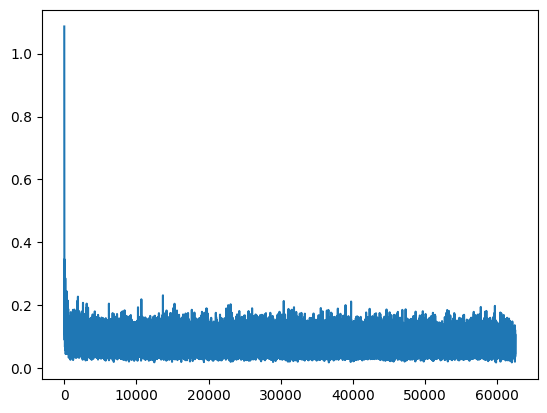

In [ ]:
# plt.figure(figsize=(20,2))
# test_ddpm = test_ddpm.to(device)
# show_backward_diffusion(test_ddpm, None, 10)

print(store_path)
model = torch.load(store_path)
loss_list = torch.load(store_loss_path)
# best_model = MyDDPM(MyUNet(), n_steps=1000, device=device)
# best_model.load_state_dict(model)
# best_model = MyDDPM(unet_mnist, n_steps=T, min_beta=min_beta, max_beta=max_beta, device=device)
best_unet = ClassConditionedUnet(num_classes = 2)
best_model = DDPM(unet_artbench_cosine_32_2class_T4, n_steps=T, min_beta=0.0001, max_beta=0.02, beta_scheduler="cosine", device=device).to(device)
best_model.load_state_dict(model)
print("Num params: ", sum(p.numel() for p in best_model.parameters()))
best_model.eval()
plt.plot(loss_list[:])
print(len(loss_list))

tensor([7])


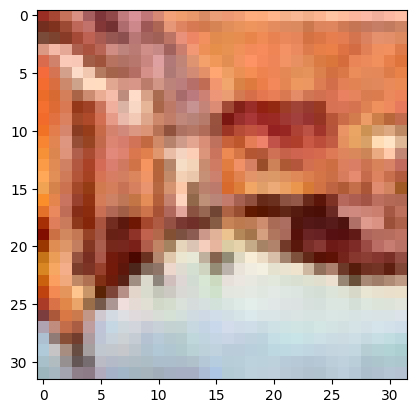

In [ ]:
# USE_TRAIN_LOADER = train_loader
USE_TRAIN_LOADER = class2_train_loader
# USE_TRAIN_LOADER = mnist_train_loader

x0, l0 = next(iter(USE_TRAIN_LOADER))
x0 = x0[:1]
l0 = l0[:1]

show_tensor_image_batch(x0)
print(l0)

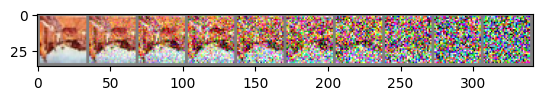

In [ ]:
n_steps = 3999
x = best_model.forward(x0, torch.tensor([n_steps]), torch.randn(x0.shape).to(device))
x = torch.clamp(x, -1., 1.)
show_tensor_image(x.detach().cpu())
show_forward_diffusion(best_model, x0, 10, mini=True)

In [ ]:
!pip3 install einops # used for generating gifs
!pip3 install imageio
import einops
import imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
def make_gif(ddpm, n_samples=16, device=None, frames_per_gif=100, gif_name="sampling.gif", mnist=False, mini=False, random_classes=True):
    """Copy the gif generating code from the HW bc it looks cool"""
    frame_idxs = np.linspace(0, ddpm.n_steps, frames_per_gif).astype(np.uint)
    frames = []

    shape = (1, 28, 28) if mnist else (3,32,32) if mini else (3, 256, 256)
    n_samples = n_samples if random_classes else 16
    shape = (n_samples, *shape)

    with torch.no_grad():
        if device is None:
            device = ddpm.device

        # Starting from random noise
        x = torch.randn(shape).to(device)
        classes = torch.randint(0, 10, (n_samples,), device=device).long() if random_classes else torch.tensor([[i]*8 for i in range(2)]).flatten().to(device)
        print("classes: ", classes)

        for idx, t in tqdm(enumerate(list(range(ddpm.n_steps))[::-1]), total=ddpm.n_steps):
            # Estimating noise to be removed
            time_tensor = torch.full((n_samples,), t).to(device).long()
            x = sample(ddpm, x, time_tensor, classes)

            # Adding frames to the GIF
            if idx in frame_idxs or t == 0:
                # Putting digits in range [0, 255]
                normalized = x.clone()
                for i in range(len(normalized)):
                    normalized[i] -= torch.min(normalized[i])
                    normalized[i] *= 255 / torch.max(normalized[i])

                # Reshaping batch (n, c, h, w) to be a (as much as it gets) square frame
                frame = einops.rearrange(normalized, "(b1 b2) c h w -> (b1 h) (b2 w) c", b1=int(n_samples ** 0.5))
                frame = frame.cpu().numpy().astype(np.uint8)

                # Rendering frame
                frames.append(frame)

    # Storing the gif
    with imageio.get_writer(gif_name, mode="I") as writer:
        for idx, frame in enumerate(frames):
            writer.append_data(np.array(frame).squeeze())
            if idx == len(frames) - 1:
                for _ in tqdm(range(frames_per_gif // 3)):
                    writer.append_data(np.array(frames[-1]).squeeze())
    return x

In [ ]:
gif_name = "artbench_32_cosine_2class_T4.gif"
# gif_name = "single_artbench_32.gif"
print(classes)

['impressionism' 'realism' 'romanticism' 'expressionism' 'baroque'
 'post_impressionism' 'art_nouveau' 'surrealism' 'ukiyo_e' 'renaissance']


In [ ]:
imgs = make_gif(
        best_model,
        n_samples=12,
        device=device,
        gif_name=gif_name,
        mini=True,
        random_classes=False
    )
# imgs = make_gif(
#         best_model,
#         n_samples=1,
#         device=device,
#         gif_name=gif_name,
#         mini=True
#     )

classes:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

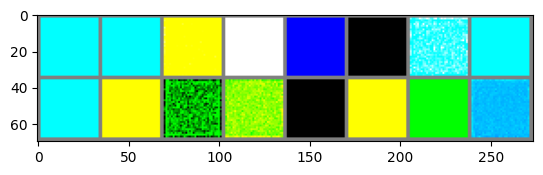

In [ ]:
show_tensor_image_batch(imgs)

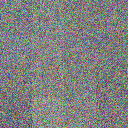

In [ ]:
Image(open(gif_name,'rb').read(), height = 300, width = 300)

In [ ]:
plt.figure(figsize=(20,2))
# images = show_backward_diffusion_2(ddpm_mnist, x0, l0, 10)
label = torch.randint(0, 1, (1,), device=device).long()
print(label)
print(classes[label])
images = show_backward_diffusion(best_model, label=label, mini=True)

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(reverse_transformations(images[0]))
plt.subplot(1, 2, 2)
plt.imshow(reverse_transformations(images[9]))
# show_tensor_image(images[9])
# plt.figure(figsize=(40,4))
# for i in range(10):
#   plt.subplot(1, 10, i+1)
#   plt.imshow(reverse_transformations(images[i]))

# sampling code for classification

In [ ]:
from torch import linalg as LA

mse = nn.MSELoss()

@torch.no_grad()
def sample_classification(ddpm, img, num_trials=1000, max_T=1000, n_classes=10, mnist=False, mini=False):
  """
  use a given model and input image to produce an array of probabilities that the image belongs to each class
  """
  errors = np.zeros(n_classes)
  x0 = img.to(device)

  shape = (1, 1, 28, 28) if mnist else (1, 3, 32, 32) if mini else (1, 3, 256, 256)
  for i in tqdm(range(num_trials)):
    eta = torch.randn(shape).to(device).float()
    t = torch.randint(0, max_T, (1,), device=device).long()
    noisy_imgs = ddpm.forward(x0, t, eta).to(device).float()
    for label in range(n_classes):
      classes = torch.full((1,), label, device=device).long()
      eta_theta = ddpm.backward(noisy_imgs, t, classes)

      loss = mse(eta_theta, eta)

      errors[label] += loss / num_trials

  return errors

def display_ranks(errors):
  return np.argsort(errors)

In [ ]:
# errors = sample_classification(best_model, x0, mnist=True)
# ranks = display_ranks(errors)

# print(errors, ranks)

@torch.no_grad()
def monte_carlo_classification(ddpm, loader, n_images=1000, num_trials=1000, max_T=500, n_classes=10, mnist=False, mini=False):
  """
  use a given model and input image to produce an array of probabilities that the image belongs to each class
  """
  total_images = 0
  topn = np.zeros(n_classes)
  nsteps = n_images // BATCH_SIZE
  for _ in tqdm(range(nsteps)):
    xbatch, lbatch = next(iter(loader))
    for i in range(BATCH_SIZE):
      x0 = xbatch[i:i+1]
      l0 = lbatch[i:i+1]
      print(l0)
      # if (n_classes == 2):
      #   l0 = convert_classes(l0)
      # errors = sample_classification(ddpm, x0, num_trials=num_trials, max_T=max_T, n_classes=n_classes, mnist=mnist, mini=mini)
      # ranks = display_ranks(errors)
      # print(l0, ranks)

      # seen = False
      # for rank in range(n_classes):
      #   if (ranks[rank] == l0 or seen):
      #     topn[rank] += 1
      #     seen = True
      # total_images += 1
      # print(total_images)
      # print(topn / total_images)
  return topn / total_images


In [ ]:
# topn = monte_carlo_classification(best_model, USE_TRAIN_LOADER, n_classes=2, num_trials=2000, mini=True)